In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from data_processor import ChurnDataProcessor

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load and inspect data
processor = ChurnDataProcessor()
df = processor.load_data()
processor.get_data_info()

📊 Data loaded successfully: (7043, 21)

📋 Dataset Information:
   Shape: (7043, 21)
   Columns: 21
   Missing values: 0
   Churn rate: 26.5%


{'shape': (7043, 21),
 'columns': 21,
 'missing_values': 0,
 'churn_rate': 26.536987079369588}

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_5024\608717574.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([stayed, churned], labels=['Stayed', 'Churned'])


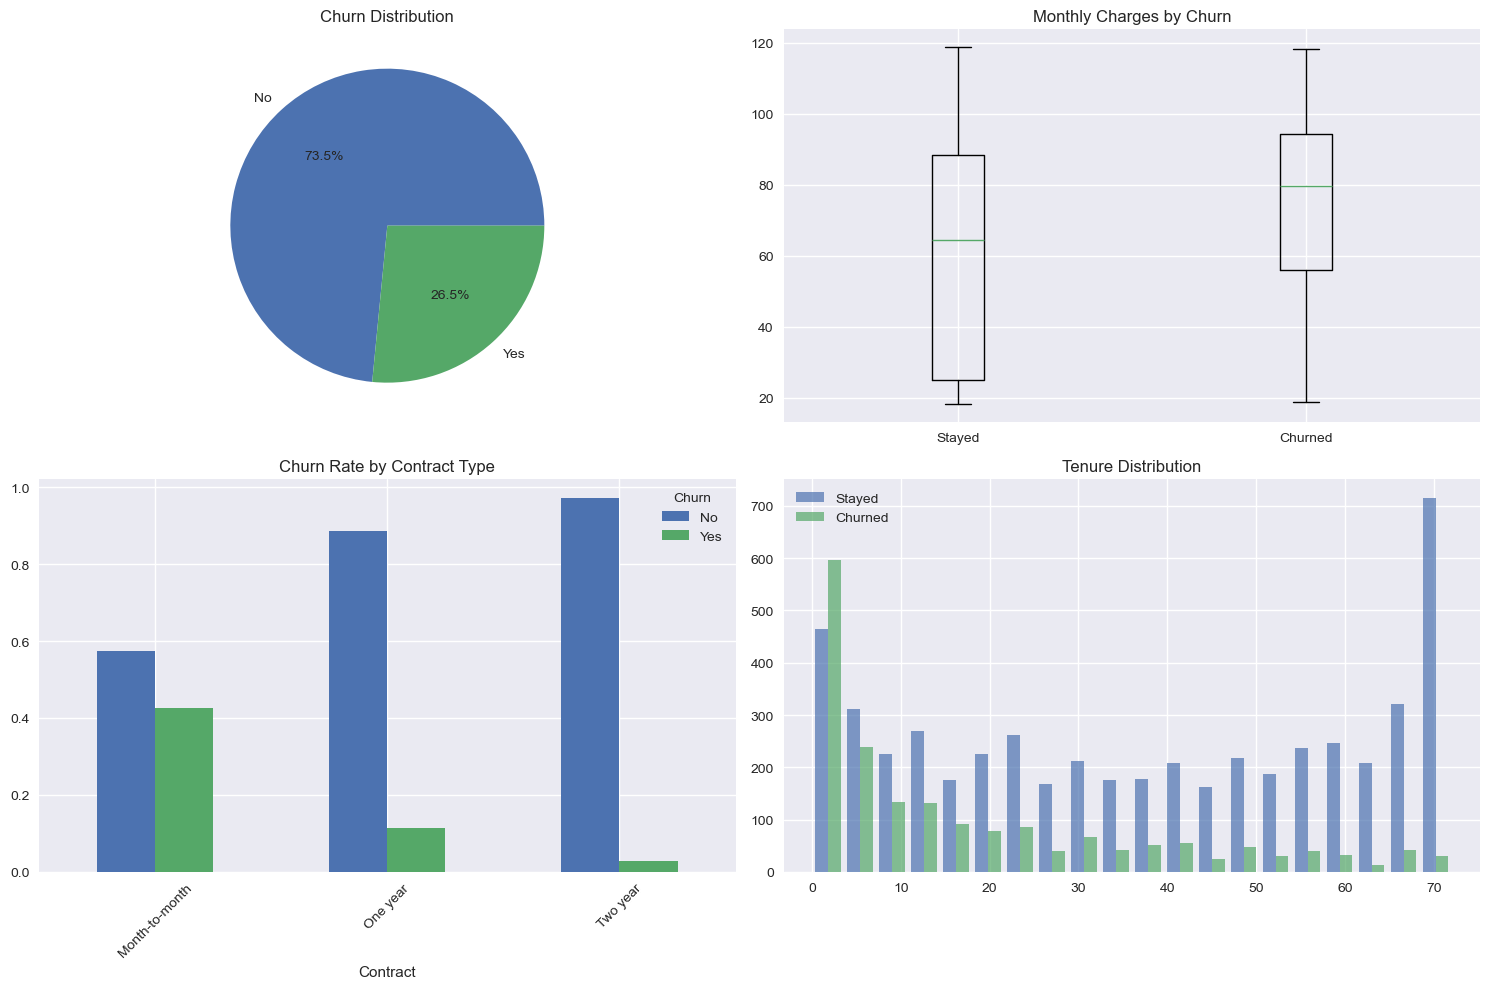

In [3]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Churn distribution
churn_counts = df['Churn'].value_counts()
axes[0,0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Churn Distribution')

# Monthly charges by churn status
churned = df[df['Churn'] == 'Yes']['MonthlyCharges']
stayed = df[df['Churn'] == 'No']['MonthlyCharges']
axes[0,1].boxplot([stayed, churned], labels=['Stayed', 'Churned'])
axes[0,1].set_title('Monthly Charges by Churn')

# Contract type analysis
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
contract_churn.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Churn Rate by Contract Type')
axes[1,0].tick_params(axis='x', rotation=45)

# Tenure distribution
axes[1,1].hist([df[df['Churn'] == 'No']['tenure'], 
                df[df['Churn'] == 'Yes']['tenure']], 
               bins=20, alpha=0.7, label=['Stayed', 'Churned'])
axes[1,1].set_title('Tenure Distribution')
axes[1,1].legend()

plt.tight_layout()
plt.show()